# Set Up

## Only Once

In [ ]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!apt install swig cmake

!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

!pip3 install pyvirtualdisplay

import os
os.kill(os.getpid(), 9)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,853 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,771 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,160 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu

---

# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Gym environment
import gymnasium as gym

# Stable Baselines 3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Hugging Face
from huggingface_sb3 import load_from_hub, package_to_hub
from huggingface_hub import notebook_login

# Virtual display
from pyvirtualdisplay import Display
from IPython.display import display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

---

# Lunar Lander Environment

## Action Space

The environment has **four discrete actions** that can be taken:

- **0**: Do nothing
- **1**: Fire left orientation engine
- **2**: Fire main engine
- **3**: Fire right orientation engine

These actions control the lunar lander's movement, including its orientation and thrust.

## Observation Space

The observation is represented as an **8-dimensional vector**:

- **[x]**: x-coordinate of the lander
- **[y]**: y-coordinate of the lander
- **[x_velocity]**: Linear velocity in the x-direction
- **[y_velocity]**: Linear velocity in the y-direction
- **[angle]**: Angle of the lander (in radians)
- **[angular_velocity]**: Angular velocity (rotation speed)
- **[left_leg_contact]**: Boolean indicating if the left leg is in contact with the ground (1 = True, 0 = False)
- **[right_leg_contact]**: Boolean indicating if the right leg is in contact with the ground (1 = True, 0 = False)

This vector provides all the necessary information about the lander's state and environment.

## Bibliography

For further information on the Lunar Lander environment, please refer to the official documentation provided by Gymnasium:

- [Lunar Lander - Gymnasium Documentation](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

---

# Random Actions Testing

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ 17.91634   -19.228231   -2.6521275  -0.9413494  -2.067941   -1.2494006
   0.1699774   0.9933035]
_____________________________ 

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [45.411163   22.809221   -0.9003565   0.22100225  0.9859598   2.104775
  0.2597615   0.18653823]
_____________________________ 

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [-21.15337    -49.91406     -4.1446147   -1.4037198    0.5651374
   4.1754966    0.632396     0.07425549]
_____________________________ 

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ 83.944534   -19.295103    -4.7859645    4.5812907   -1.7106358
   0.48990896   0.7445775    0.30416894]
_____________________________ 

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [ 6.4357262e+01  6.9015098e+00 -3.6439056e+00 -5.8864880e-01
  1.4512855e-

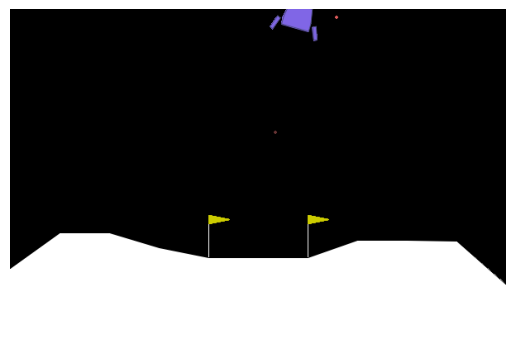

In [ ]:
# Create the environment
env = gym.make("LunarLander-v2", render_mode="rgb_array")

observation, info = env.reset()

frames = []

# Capture frames for 100 steps
for _ in range(100):
    action = env.action_space.sample()  # Random action
    observation, reward, terminated, truncated, info = env.step(action)  # Perform action

    frame = env.render()
    frames.append(frame)  # Save frame

    print("_____OBSERVATION SPACE_____ \n")
    print("Observation Space Shape", env.observation_space.shape)
    print("Sample observation", env.observation_space.sample())
    print("_____________________________ \n")

    # print("\n _____ACTION SPACE_____ \n")
    # print("Action Space Shape", env.action_space.n)
    # print("Action Space Sample", env.action_space.sample())

    # Reset the environment if needed
    if terminated or truncated:
        print("Environment reset!")
        observation, info = env.reset()

# Close at the end
env.close()

fig, ax = plt.subplots()
img = ax.imshow(np.zeros((400, 600, 3), dtype=np.uint8))
ax.axis('off')

def update_frame(frame):
    img.set_data(frame)
    return [img]

# Create animation
ani = animation.FuncAnimation(fig, update_frame, frames=frames, interval=100, blit=True)

# Save animation
ani.save('lunar_lander_random.mp4', writer='ffmpeg', fps=20)

# display(fig)

# Stop the virtual display at the end
virtual_display.stop()

---

# Training and Evaluating the PPO Agent

In [4]:
# Create environment
env = gym.make('LunarLander-v2')

# To Test: CNN, DQN, parameters...

# Instantiate the agent
model = PPO(
    policy="MlpPolicy",
    env=env,
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.999,
    gae_lambda=0.98,
    ent_coef=0.01,
    verbose=1,
)

# Train it for 1,000,000 timesteps
model.learn(total_timesteps=1000000)
# Save the model
model_name = "ppo-LunarLander-v2-test"
model.save(model_name)

eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

Se han truncado las últimas 5000 líneas del flujo de salida.
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 276          |
|    ep_rew_mean          | 258          |
| time/                   |              |
|    fps                  | 552          |
|    iterations           | 740          |
|    time_elapsed         | 1371         |
|    total_timesteps      | 757760       |
| train/                  |              |
|    approx_kl            | 0.0061172596 |
|    clip_fraction        | 0.0637       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.741       |
|    explained_variance   | 0.98808795   |
|    learning_rate        | 0.0003       |
|    loss                 | 7.37         |
|    n_updates            | 2956         |
|    policy_gradient_loss | -0.00698     |
|    value_loss           | 17.1         |
------------------------------------


---


# Utils

In [11]:
def create_environment():
    env = gym.make("LunarLander-v2", render_mode="rgb_array")
    return env

def capture_frames(env, n_steps=100, action_fn=None):
    observation, info = env.reset()
    frames = []

    for _ in range(n_steps):
        action = action_fn(observation) if action_fn else env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        frame = env.render()
        frames.append(frame)

        # Reset the environment if terminated or truncated
        if terminated or truncated:
            print("Environment reset!")
            observation, info = env.reset()

    return frames


def save_animation(frames, filename="lunar_lander_animation.mp4"):

    fig, ax = plt.subplots()
    img = ax.imshow(np.zeros((400, 600, 3), dtype=np.uint8))
    ax.axis('off')

    def update_frame(frame):
        img.set_data(frame)
        return [img]

    ani = animation.FuncAnimation(fig, update_frame, frames=frames, interval=100, blit=True)
    ani.save(filename, writer='ffmpeg', fps=20)

In [13]:
def run_random_actions():
    env = create_environment()
    frames = capture_frames(env, n_steps=500)
    env.close()
    return frames

def run_trained_agent(model):
    env = create_environment()

    def action_fn(observation):
        return model.predict(observation, deterministic=True)[0]  # Predict action from model

    frames = capture_frames(env, n_steps=500, action_fn=action_fn)
    env.close()
    return frames



---



# Running the Lunar Lander Environment and Capturing Videos

Environment reset!
Environment reset!
Environment reset!
Environment reset!
Environment reset!


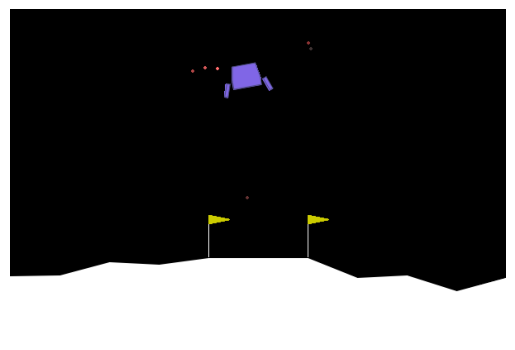

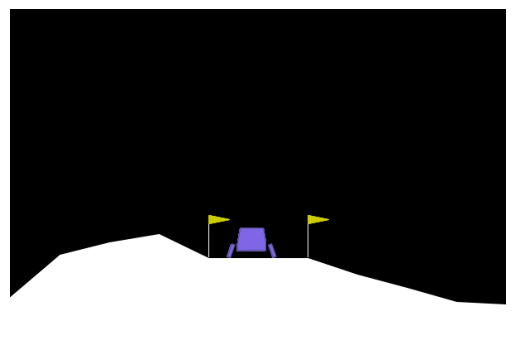

In [14]:
# Run random actions
random_frames = run_random_actions()
save_animation(random_frames, 'lunar_lander_random.mp4')

# Run a trained agent
model = PPO.load("ppo-LunarLander-v2-test")
trained_frames = run_trained_agent(model)
save_animation(trained_frames, 'lunar_lander_trained.mp4')


---


# Upload to Hugging Face HUB

In [18]:
# Run and copy/paste token write permissions
notebook_login()
!git config --global credential.helper store

In [19]:
# Define the name of the environment
env_id = "LunarLander-v2"

# TODO: Define the model architecture we used
model_architecture = "PPO"

## Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name}
## CHANGE WITH YOUR REPO ID
repo_id = "sbolanowski/ppo-LunarLander-v2" # Change with your repo id, you can't push with mine!!! 😄

## Define the commit message
commit_message = "Upload PPO LunarLander-v2 trained agent"

# Create the evaluation env and set the render_mode="rgb_array"
eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])

# PLACE the package_to_hub function you've just filled here
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)


ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Saving video to /tmp/tmpljar2lfx/-step-0-to-step-1000.mp4


/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /tmp/tmpljar2lfx/-step-0-to-step-1000.mp4.
Moviepy - Writing video /tmp/tmpljar2lfx/-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmpljar2lfx/-step-0-to-step-1000.mp4
ℹ Pushing repo sbolanowski/ppo-LunarLander-v2 to the Hugging Face
Hub


Uploading...:   0%|          | 0.00/439k [00:00<?, ?B/s]

ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/sbolanowski/ppo-LunarLander-v2/tree/main/


CommitInfo(commit_url='https://huggingface.co/sbolanowski/ppo-LunarLander-v2/commit/c4554d68a19aa064ab516494b066884f9e5ca92e', commit_message='Upload PPO LunarLander-v2 trained agent', commit_description='', oid='c4554d68a19aa064ab516494b066884f9e5ca92e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/sbolanowski/ppo-LunarLander-v2', endpoint='https://huggingface.co', repo_type='model', repo_id='sbolanowski/ppo-LunarLander-v2'), pr_revision=None, pr_num=None)